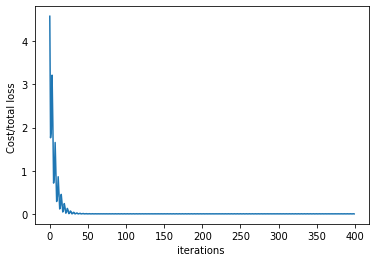

tensor([[-1.7358,  0.3716]], grad_fn=<AddmmBackward>)


In [0]:
import torch
from torch import nn,optim
from torch.utils.data import DataLoader, Dataset

import numpy as np
import matplotlib.pyplot as plt

torch.manual_seed(1)
class Data2D(Dataset):
  def __init__(self):
    self.x = torch.zeros(20,2)
    self.x[:,0]=torch.arange(-1.0,1.0,0.1)
    self.x[:,1]=torch.arange(-1.0,1.0,0.1)
    self.w=torch.tensor([ [1.0,-1.0],[1.0,3.0] ])
    self.b = torch.tensor([[-1.0,1.0]])
    self.f = torch.mm(self.x, self.w) + self.b
    self.y = self.f +0.1 * torch.randn(self.x.shape[0],1)
    self.len = self.x.shape[0]
  
  def __getitem__(self,index):
    return self.x[index], self.y[index]

  def __len__(self):
    return self.len


data_set = Data2D()


class LR(nn.Module):
  def __init__(self, input, output):
    super(LR,self).__init__()
    self.linear=nn.Linear(input,output)
    
  def forward(self,x):
    yhat = self.linear(x)
    return yhat

model = LR(2,2)

optimiser = optim.SGD(model.parameters(), lr = 0.1)
criterion = nn.MSELoss()
trainloader = DataLoader(dataset=data_set, batch_size=5)

LOSS=[]
def regr(iter):
  for epoch in range(iter):
    for x,y in trainloader:
      #print(x)
      yhat = model(x)
      loss = criterion(yhat,y)
      LOSS.append(loss.item())
      optimiser.zero_grad()
      loss.backward()
      optimiser.step()

regr(100)


plt.plot(LOSS)
plt.xlabel("iterations ")
plt.ylabel("Cost/total loss ")
plt.show()

x = torch.tensor([[-1.0,1.0]])
print(model(x))